### Data Analysis and Visualizations

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the CLEANED DataFrame
df_clean = pd.read_pickle('../data/cleaned_df.pkl')  # Load as df_clean
print("✅ Cleaned DataFrame loaded successfully!")
print(f"Shape: {df_clean.shape}")
print(f"Columns: {list(df_clean.columns)}")

✅ Cleaned DataFrame loaded successfully!
Shape: (406829, 12)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'DayOfWeek', 'TotalAmount']


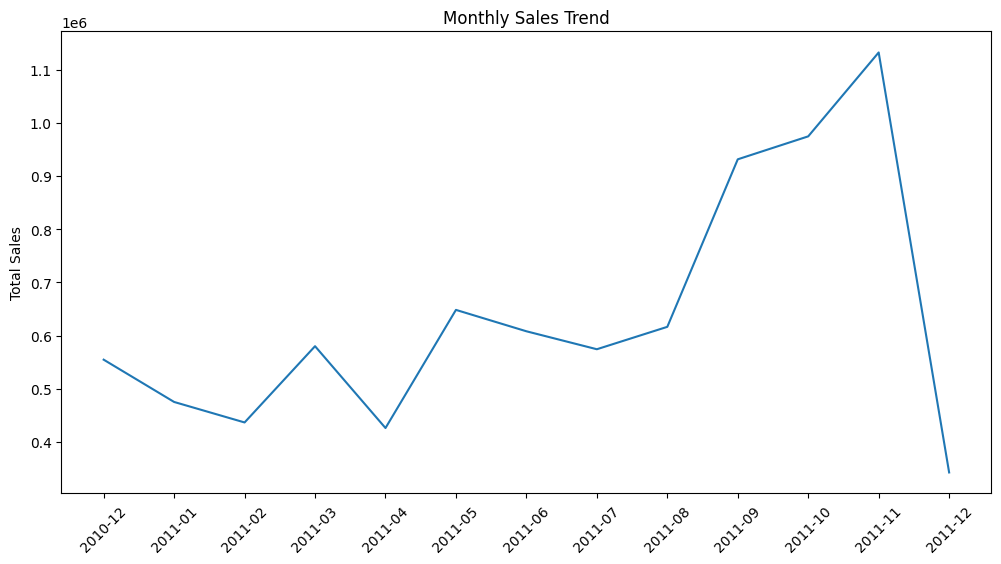

In [8]:
# Monthly sales trend
monthly_sales = df_clean.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalAmount'])
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

In [9]:
# Customer purchase behavior
customer_stats = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of orders
    'TotalAmount': ['sum', 'mean'],  # Total and average spending
    'Quantity': 'sum'  # Total items bought
}).round(2)

customer_stats.columns = ['Orders', 'Total_Spent', 'Avg_Order_Value', 'Total_Items']
customer_stats = customer_stats.reset_index()

# Top 10 customers
top_customers = customer_stats.nlargest(10, 'Total_Spent')
print("Top 10 Customers by Total Spending:")
print(top_customers)

Top 10 Customers by Total Spending:
      CustomerID  Orders  Total_Spent  Avg_Order_Value  Total_Items
1703     14646.0      77    279489.02           134.05       196719
4233     18102.0      62    256438.49           592.24        64122
3758     17450.0      55    187482.17           534.14        69029
1895     14911.0     248    132572.62            22.46        77180
55       12415.0      26    123725.45           159.03        77242
1345     14156.0      66    113384.14            79.85        57025
3801     17511.0      46     88125.38            81.90        63012
3202     16684.0      31     65892.08           234.49        49390
1005     13694.0      60     62653.10           107.10        61803
2192     15311.0     118     59419.34            23.85        37720


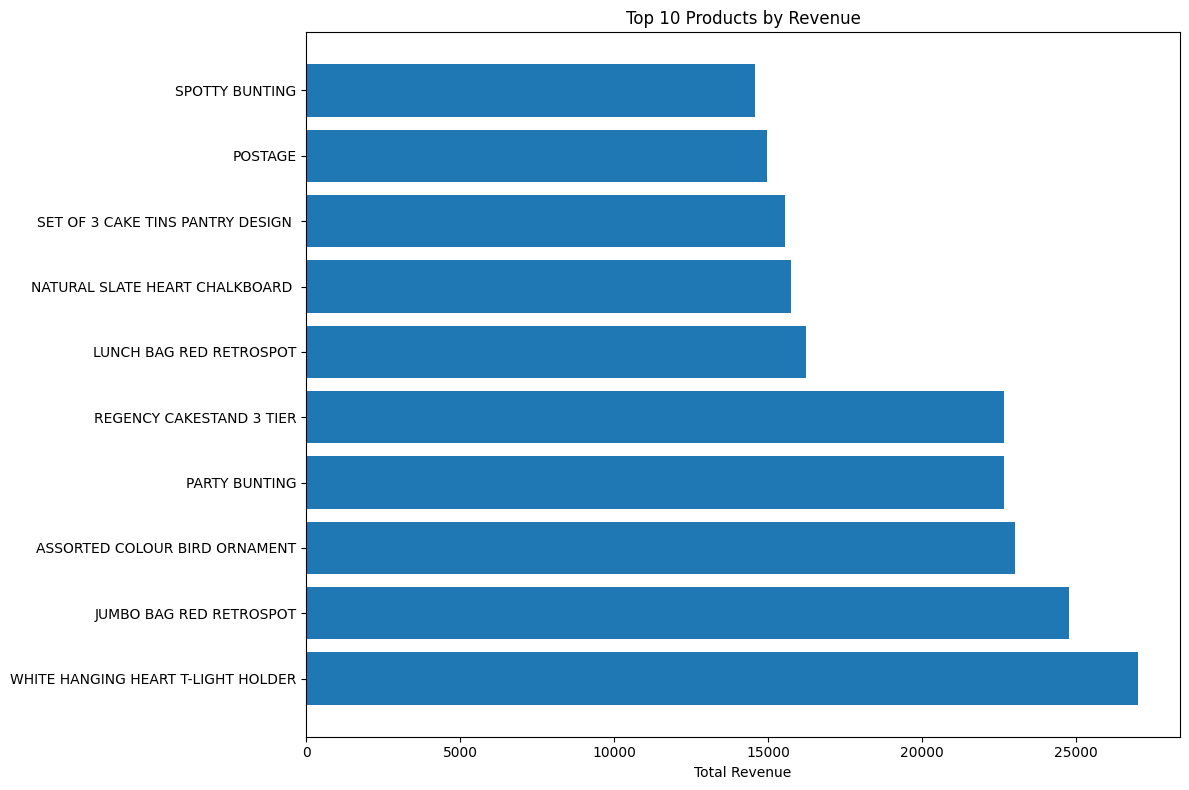

In [ ]:
# Top selling products
product_sales = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).sort_values('TotalAmount', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(product_sales.index, product_sales['TotalAmount'])
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

### Output

In [ ]:
plt.savefig('visualizations/monthly_sales_trend.png', dpi=300, bbox_inches='tight')